          Energy percentage  Standard deviation  Standard error
Alcoholp           0.000000            0.000000        0.000000
Proteinp          23.767847            1.974775        0.987388
Carbsp            44.543602            3.988523        1.994262
Fatp              31.688551            5.546883        2.773441


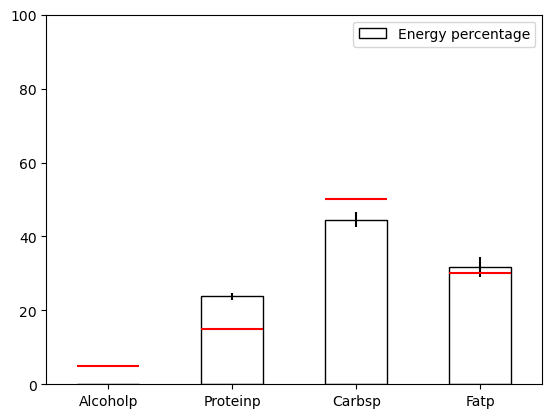

In [14]:
import pandas as pd
from os import path
import numpy as np
import matplotlib.pyplot as plt
import math

def load_dict(dict_file,sep=';'):
    with open(dict_file,'r') as f:
        return dict([(l[0],float(l[1])) for l in [l.split(';') for l in f.readlines()]])

def mean_stderr_ref_plot(mean_stderr_df,ref,column_names, mean_std_stderr_columnnames):
    mean,std,stderr = mean_std_stderr_columnnames
    ax = mean_stderr_df.plot(ylim=(0, 100),kind='bar',y=mean, yerr=stderr, rot=0, fill=False)
    width=0.5
    x=0
    for i,c in enumerate(column_names):
        ax.hlines(ref[c], x - width/2, x + width/2, color='red')
        x += 1

TOTAL_ENERGY = 'Total energy'
def analysis(input_df,columns,mean_std_stderr_columnnames):
    mean,std,stderr = mean_std_stderr_columnnames
    df = input_df.copy()
    energy_columns = [c.split()[0] for c in columns]
    energy_percentage_columns = [c+'p' for c in energy_columns]

    # calculate energy, total energy and energy percentage for each column in trial dataset and reference dataset and store in 'energy_columns'
    # energy
    for mc,ec in zip(columns,energy_columns):
        df[ec] = df[mc]*kcal_pr_g[mc]
    
    # total energy
    df[TOTAL_ENERGY] = df[energy_columns].sum(axis=1)

    # and energy percentage
    for ec,epc in zip(energy_columns,energy_percentage_columns):
        df[epc] = 100 * df[ec] / df[TOTAL_ENERGY]

    # mean and std dev
    mean_std_df = df[energy_percentage_columns].describe().loc[['mean','std']].T
    mean_std_df = mean_std_df.rename(columns={'mean':mean,'std': std})
    mean_std_df[stderr] = mean_std_df[std] / math.sqrt(len(mean_std_df))
    
    return df, mean_std_df, [columns, energy_columns, energy_percentage_columns]

ref = load_dict('work/nordic-nutrition-recommendations-transposed.csv')
kcal_pr_g = load_dict('work/kcal_pr_g.csv')

df = pd.read_csv('work/ffq.tsv',sep='\t')
df = pd.read_csv('work/4-day-julian.csv',sep=';')

macronutrient_columns = ['Alcohol (g)','Protein (g)','Carbs (g)','Fat (g)']

students = [3,4,22,34,66,35]
df = df[df['Stud_Nr'].isin(students)][macronutrient_columns].apply(pd.to_numeric)

mean_std_stderr_columnnames = ('Energy percentage','Standard deviation','Standard error')

result_df, result_mean_std_df, column_names = analysis( df, macronutrient_columns, mean_std_stderr_columnnames)
print(result_mean_std_df)
mean_stderr_ref_plot(result_mean_std_df, ref, column_names[-1], mean_std_stderr_columnnames)
plt.show()
